# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys
    
    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset


In [3]:
### Part 1: Data Loading and Exploration (4 points)
# 1. Load the MNIST dataset using fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=True)


In [4]:
#Provide your code for part 1-2 here
"""
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
"""
# Dataset dimensions and size
print(f"Dataset dimensions: {mnist.data.shape}")
print(f"Dataset size: {mnist.data.size}")
# Number of classes
print(f"Number of classes: {len(mnist.target.unique())}")

Dataset dimensions: (70000, 784)
Dataset size: 54880000
Number of classes: 10


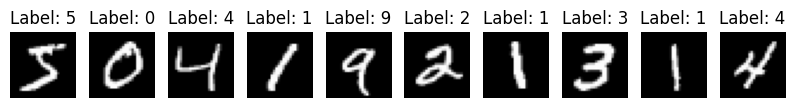

In [5]:
#Provide your code for part 1-3 here
# 3. Visualize sample digits from the dataset
def plot_digits(data, labels, n=10):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.imshow(data[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()
# Plot sample digits
plot_digits(mnist.data.values, mnist.target.values, n=10)



### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets


In [6]:
# Provide your code for part 2 here
'''### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets'''
# 1. Scale the pixel values to range [0,1]
mnist.data /= 255.0
# 2. Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)
# 3. Create a StandardScaler object and fit it on the training data
scaler = StandardScaler()
scaler.fit(X_train)
# 4. Transform both training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 5. Print the shapes of the resulting training and test sets
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set shape: (56000, 784)
Test set shape: (14000, 784)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [9]:
# Provide your code for part 3-1 here
### Part 3: Model Training and Evaluation (8 points)
#1. Train a Logistic Regression model using the training data. Use the default parameters.
# 1. Train a Logistic Regression model using the training data
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg.fit(X_train_scaled, y_train)



/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [10]:
# Provide your code for part 3-2 here
# 2. Train a Neural Network model using the training data
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=1000)
nn_model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models


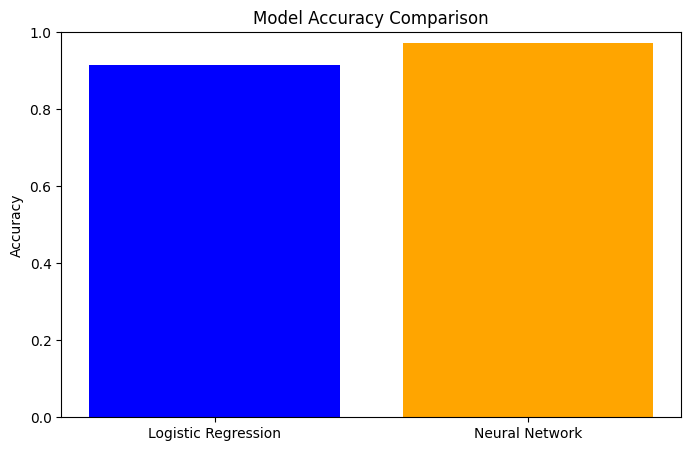

In [11]:
# Provide your code for part 4-1 here
### Part 4: Model Comparison and Visualization (4 points)
'''
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models
'''
# 1. Use a bar plot to compare the accuracy of both models on the test data
log_reg_pred = log_reg.predict(X_test_scaled)
nn_pred = nn_model.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
nn_accuracy = accuracy_score(y_test, nn_pred)
# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(['Logistic Regression', 'Neural Network'], [log_reg_accuracy, nn_accuracy], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000

Logistic Regression Confusion Matrix:


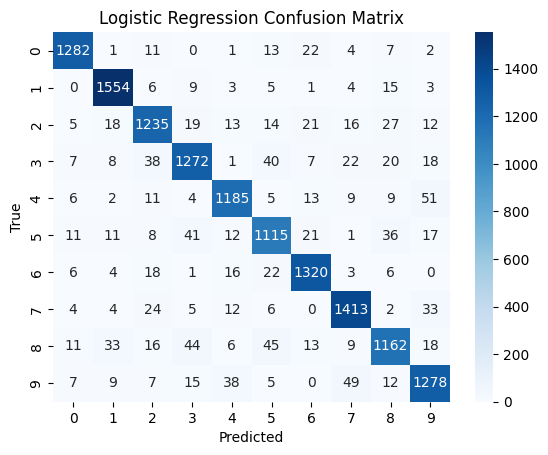

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.97      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.97      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Neural Network Confusion Matrix:


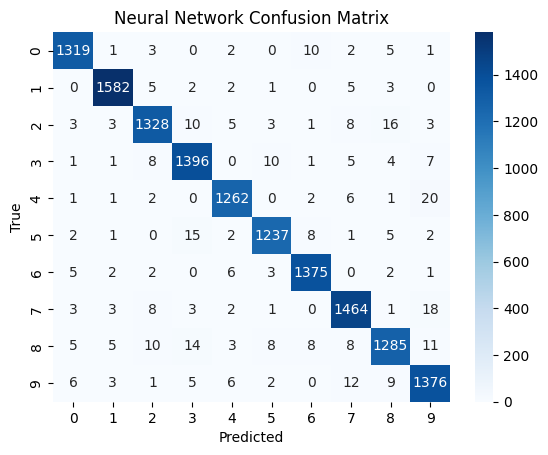

In [12]:
# Provide your code for part 4-2 here
# 2. Print the classification report and confusion matrix for both models
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred))
print("Logistic Regression Confusion Matrix:")
cm_log_reg = confusion_matrix(y_test, log_reg_pred)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))
print("Neural Network Confusion Matrix:")
cm_nn = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

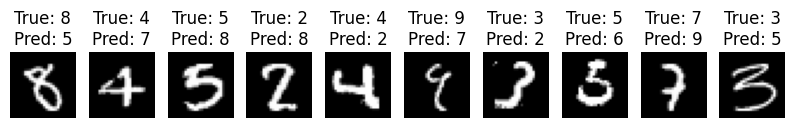

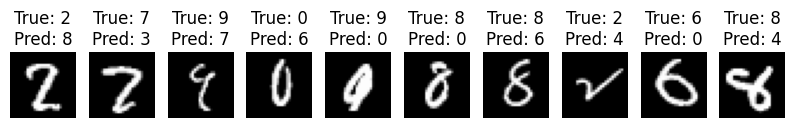

In [23]:
# Provide your code for part 4-3 here
# 3. Visualize the misclassified examples for both models

def plot_misclassified(X, y_true, y_pred, n=10):
    # Ensure y_true and y_pred are strings for proper comparison
    y_true = np.array(y_true, dtype=str)
    y_pred = np.array(y_pred, dtype=str)
    
    # Find misclassified indices
    misclassified_indices = np.where(y_true != y_pred)[0]
    
    # Plot misclassified examples
    plt.figure(figsize=(10, 4))
    for i in range(min(n, len(misclassified_indices))):  # Ensure we don't exceed the number of misclassified examples
        plt.subplot(2, n, i + 1)
        plt.imshow(X[misclassified_indices[i]].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_true[misclassified_indices[i]]}\nPred: {y_pred[misclassified_indices[i]]}")
        plt.axis('off')
    plt.show()

# Ensure X_test is rescaled back to the original range [0, 255] for visualization
X_test_original = X_test.values * 255.0  # Convert to NumPy array if needed

# Plot misclassified examples for Logistic Regression
plot_misclassified(X_test_original, y_test, log_reg_pred, n=10)

# Plot misclassified examples for Neural Network
plot_misclassified(X_test_original, y_test, nn_pred, n=10)